In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from validclust import dunn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

C:\Users\user\AppData\Local\Temp\ipykernel_22996\3533512480.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load Dataset

In [3]:
file_path = 'customers_dataset.csv'
df = pd.read_csv(file_path)

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

X = df.values

ELBOW

In [4]:
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette Score

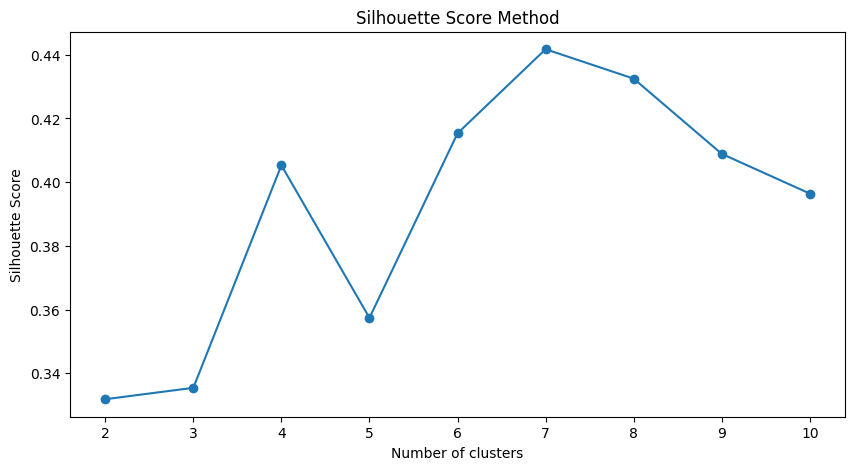

In [ ]:
silhouette_scores = []
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters+ 1), silhouette_scores,marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Davies-Bouldin Index

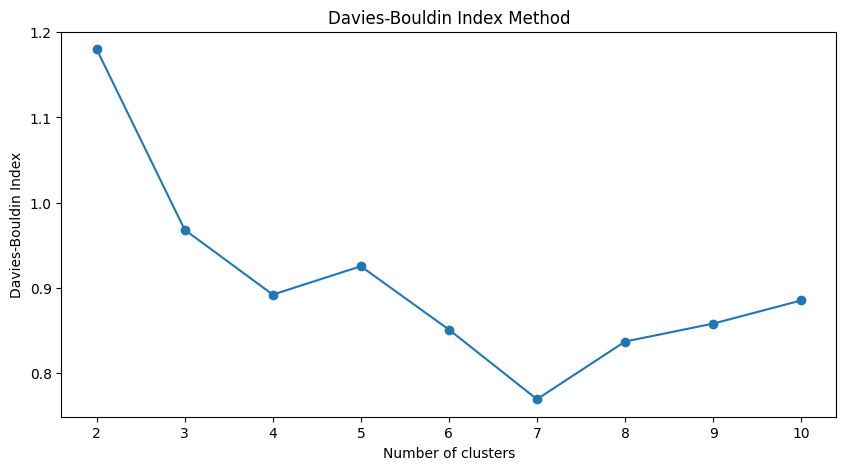

In [ ]:
davies_bouldin_scores = []
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    davies_bouldin_scores.append(davies_bouldin_score(X, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index Method')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

Calinski-Harabasz Index

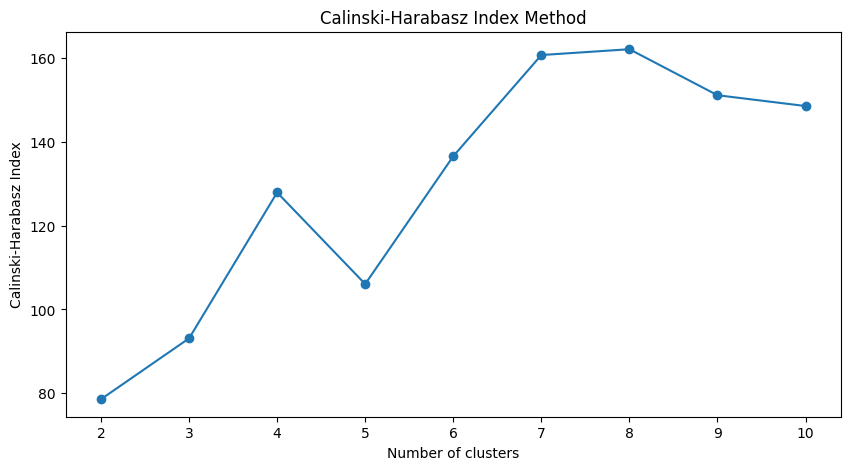

In [ ]:
calinski_harabasz_scores = []
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    calinski_harabasz_scores.append(calinski_harabasz_score(X, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Index Method')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.show()

Dunn Index

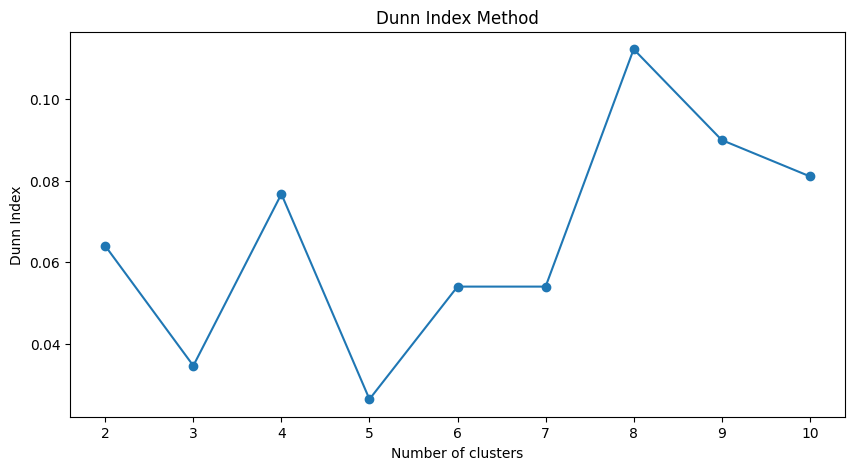

In [ ]:
dunn_indices = []

dist_matrix = squareform(pdist(X))

for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    dunn_index_value = dunn(dist_matrix, labels)
    dunn_indices.append(dunn_index_value)

plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), dunn_indices, marker='o')
plt.title('Dunn Index Method')
plt.xlabel('Number of clusters')
plt.ylabel('Dunn Index')
plt.show()

Using t-SNE to Display

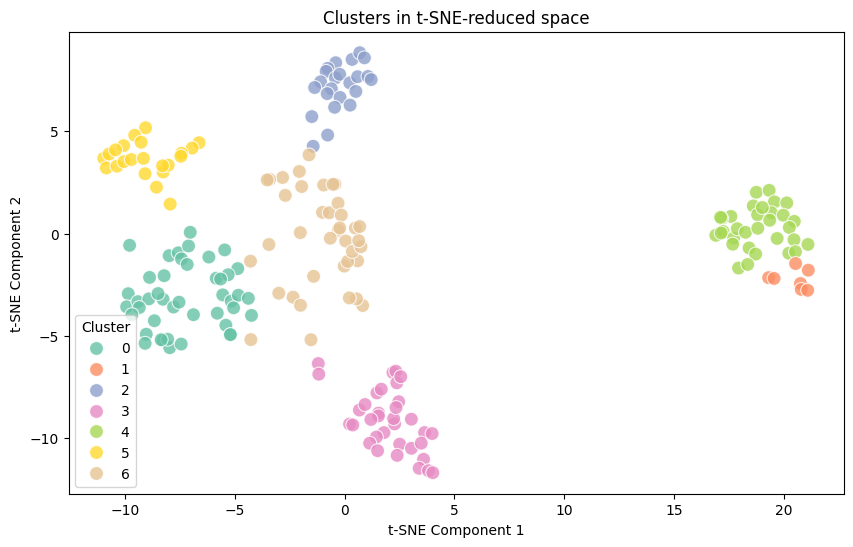

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Perform clustering (adjust parameters as per your analysis)
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X)

# Visualize clusters in t-SNE reduced space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans.labels_, palette='Set2', s=100, alpha=0.8)
plt.title('Clusters in t-SNE-reduced space')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

Pairwise Plots

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Create pairplot with cluster labels
sns.pairplot(df, hue='Cluster', palette='Set1')
plt.suptitle('Pairplot of Clustering Results', y=1.02)
plt.show()

NameError: name 'KMeans' is not defined